In [1]:
from skimage import io
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import fftpack
import numpy as np

In [2]:
image = io.imread('img_noise.png', as_gray=True)

In [3]:
image.shape, image.dtype

((789, 1051), dtype('float64'))

In [4]:
M,N = image.shape

Text(0.5, 1.0, 'Original Noisy Image')

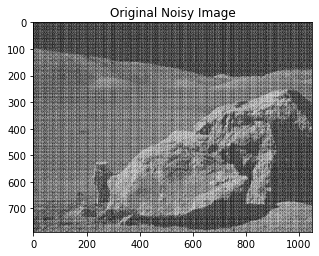

In [5]:
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image,cmap = "gray")
ax.set_title('Original Noisy Image')

In [6]:
#Return multidimensional discrete Fourier transform.
F = fftpack.fftn(image) 
F_magnitude = np.abs(F)   #absolute value of F

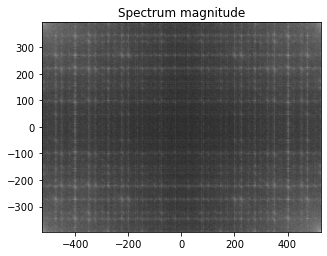

In [7]:
f, ax = plt.subplots(figsize=(5,5))

ax.imshow(np.log(1 + F_magnitude), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

In [8]:
#shifting 0 frequency component
F_magnitude = fftpack.fftshift(F_magnitude)

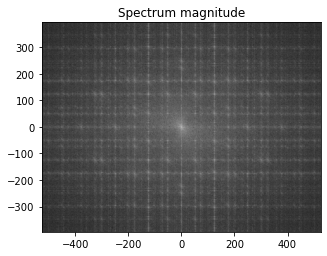

In [9]:
f, ax = plt.subplots(figsize=(5,5))

ax.imshow(np.log(1 + F_magnitude), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

In [10]:
# Set block around center of spectrum to zero
K = 30
F_magnitude[M // 2 - K: M // 2 + K, N // 2 - K: N // 2 + K] = 0

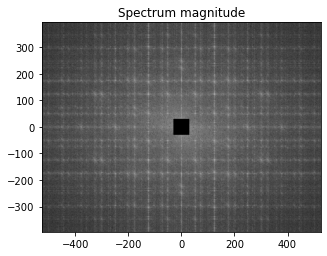

In [11]:
f, ax = plt.subplots(figsize=(5,5))

ax.imshow(np.log(1 + F_magnitude), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

In [12]:
# Find all peaks lower than the 98th percentile
peaks = F_magnitude < np.percentile(F_magnitude, 98) #for 98 percentile
peaks1 = F_magnitude < np.percentile(F_magnitude, 100) #for 100 percentile

# Shift the peaks back to align with the original spectrum
peaks = fftpack.ifftshift(peaks) #for 98 percentile
peaks1 = fftpack.ifftshift(peaks1) # for 100 percentile

Text(0.5, 1.0, 'Spectrum after suppression(100 %ile)')

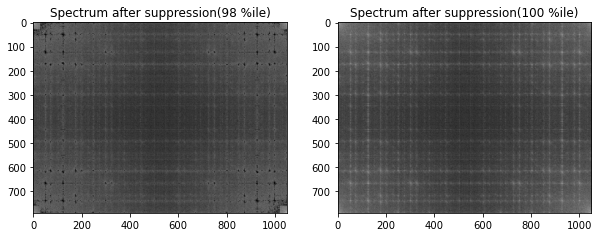

In [13]:
# Make a copy of the original (complex) spectrum
F_dim = F.copy()  # for 98 percentile
F_dim1 = F.copy() #for 100 percentile

# Set those peak coefficients to zero
F_dim = F_dim * peaks.astype(int) # for 98 percentile
F_dim1 = F_dim1 * peaks1.astype(int) #for 100 percentile

f, (ax0, ax2)= plt.subplots(1, 2, figsize=(10,10))
ax0.imshow(np.log10(1 + np.abs(F_dim)), cmap='gray')
ax0.set_title('Spectrum after suppression(98 %ile)')

ax2.imshow(np.log10(1 + np.abs(F_dim1)), cmap='gray')
ax2.set_title('Spectrum after suppression(100 %ile)')

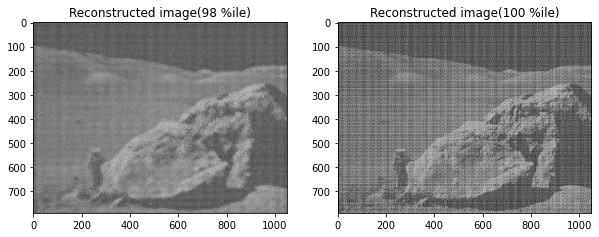

In [14]:
# Do the inverse Fourier transform to get back to an image.
# Since we started with a real image, we only look at the real part of
# the output.
image_filtered = np.real(fftpack.ifft2(F_dim)) #for 98 percentile
image_filtered1 = np.real(fftpack.ifft2(F_dim1)) #for 100 percentile

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(image_filtered, cmap="gray")
ax1.set_title('Reconstructed image(98 %ile)');

ax3.imshow(image_filtered1, cmap="gray")
ax3.set_title('Reconstructed image(100 %ile)');